# Вариант 3 Данильчик Елизавета
## Лабораторная работа №8
## Работа с интерактивными блокнотами и файлами
**Цели:**

 - Освоить работу с Excel‑файлами средствами Python
 - Научиться использовать библиотеку openpyxl для чтения и записи данных
 - Научиться строить столбчатые диаграммы с помощью matplotlib
 - Развить навыки обработки и визуализации табличных данных
 
**Задачи:**

 - Считать данные из Excel‑файла с результатами студентов
 - Выполнить вычисления (средние, максимальные, групповые показатели)
 - Построить столбчатые диаграммы по заданным вариантам
 - Подписать оси, добавить заголовки и легенды к графикам
 - Сохранить результаты и визуализации в Jupyter Notebook

In [1]:
import openpyxl  # подключаем библиотеку openpyxl для работы с Excel (.xlsx)
import matplotlib.pyplot as plt  # подключаем модуль matplotlib для построения графиков

In [ ]:
# Открываем файл с оценками
wb = openpyxl.load_workbook("students.xlsx")
print("Листы в файле:", wb.sheetnames)
sheet = wb["Оценки"]




Листы в файле: ['Оценки']


In [3]:
# создаём списки для хранения данных
fio_list = []
math_scores = []
physics_scores = []
informatics_scores = []


In [4]:
# читаем строки с оценками
for row in sheet.iter_rows(min_row=2, values_only=True):
    fio, math, physics, informatics = row
    fio_list.append(fio)
    math_scores.append(math)
    physics_scores.append(physics)
    informatics_scores.append(informatics)

In [5]:
def count_more_5(scores):
    return sum(1 for v in scores if v > 5)

# подсчёт количества учащихся с оценкой выше 5 по каждому предмету
math_count = count_more_5(math_scores)
physics_count = count_more_5(physics_scores)
informatics_count = count_more_5(informatics_scores)



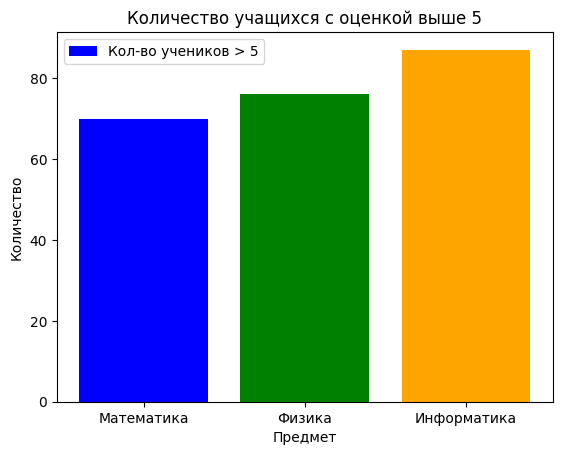

In [6]:
# подготовка данных для графика
subjects = ["Математика", "Физика", "Информатика"]
counts = [math_count, physics_count, informatics_count]

# построение столбчатой диаграммы
plt.bar(subjects, counts, color=["blue", "green", "orange"])
plt.title("Количество учащихся с оценкой выше 5")
plt.xlabel("Предмет")
plt.ylabel("Количество")
plt.legend(["Кол-во учеников > 5"])
plt.show()



In [7]:
# создаём новый Excel-файл для результатов
wb_result = openpyxl.Workbook()
sheet_result = wb_result.active
sheet_result.title = "Результаты"

# добавляем заголовки
sheet_result["A1"] = "Предмет"
sheet_result["B1"] = "Количество > 5"

# добавляем данные
sheet_result.append(["Математика", math_count])
sheet_result.append(["Физика", physics_count])
sheet_result.append(["Информатика", informatics_count])

# сохраняем файл
wb_result.save("students_count_above_5.xlsx")
print("Файл students_count_above_5.xlsx успешно создан!")

Файл students_count_above_5.xlsx успешно создан!
